In [1]:
import numpy as np 
import pandas as pd

In [13]:
netflix = pd.read_csv('netflix_titles.csv')

# Exploratory Data Analysis

In [14]:
# Checking the DataFrame for the columns details 

netflix

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


## Dealing with the null and unwanted values

In [15]:
# Checking the null values in the data.

netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [16]:
# Filling the null values in 'director' and 'cast' column with 'Not available'.

netflix.director = netflix.director.fillna('Not available')
netflix.cast = netflix.cast.fillna('Not available')

In [17]:
# Filling the null values in the 'country' column with 'Not specified'.

netflix.country = netflix.country.fillna('Not specified')

In [18]:
# Filling the unavailable dates when the show/movie was added to Netflix.

netflix.date_added = netflix.date_added.fillna('Not available')

In [19]:
# Filling the values for the unavailable ratings.

netflix.rating = netflix.rating.fillna('Not specified')

# Replacing some of the weird values containing duration with 'Not specified'.

netflix.rating = np.where(netflix.rating.str.contains('min') == True, 'Not specified', netflix.rating)

In [20]:
# Filling in the missing duration values in the data.

netflix.duration = netflix.duration.fillna('Not specified')

## Feature Engineering

In [21]:
# Dropping the 'show_id' column 

netflix = netflix.drop(['show_id'], axis = 1)

In [22]:
# Extracting the year from 'date_added' to know in which year the movie/show was added to Netflix.

netflix['added_year'] = netflix.date_added.str.split(', ').str[1]

# Filling the NaN values in the new column
netflix.added_year = netflix.added_year.fillna('Not specified')

In [23]:
# Extracting the month from 'date_added' to know in which month the movie/show was added to Netflix

netflix['added_month'] = netflix.date_added.str.split().str[0]

# Replacing the 'Not' values with 'Not specified'

netflix.added_month = np.where(netflix.added_month.str.contains('Not') == True, 'Not specified', netflix.added_month)

In [24]:
# dropping the 'date_added' column, because we have already extracted the information from that column. 

netflix = netflix.drop('date_added', axis = 1)

In [25]:
# Extracting the duration separately for TV shows and movies. 

netflix['show_seasons'] = np.where(netflix.duration.str.contains('min') == True, 'NA', netflix.duration.str.split(' ').str[0])
netflix['movies_duration'] = np.where(netflix.duration.str.contains('min') == False, 'NA', netflix.duration.str.split(' ').str[0])

# Removing the not specified values in both of the above columns. 

netflix.show_seasons = netflix.show_seasons.str.replace('Not', 'NA')
netflix.movies_duration = netflix.movies_duration.str.replace('Not', 'NA')

# Dropping 'duration', as we have already extracted the information from there. 
netflix = netflix.drop(['duration'], axis = 1)

In [26]:
# Changing the name of column 'listed_in' to 'genre'. 

netflix.rename(columns = {'listed_in': 'genre'}, inplace = True)

# Keeping the first genre in the list. 

netflix.genre = netflix.genre.str.split(',').str[0]

netflix

,type,title,director,cast,country,release_year,rating,genre,description,added_year,added_month,show_seasons,movies_duration
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,Not available,United States,2020,PG-13,Documentaries,"As her father nears the end of his life, filmm...",2021,September,NA,90
1,TV Show,Blood & Water,Not available,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021,TV-MA,International TV Shows,"After crossing paths at a party, a Cape Town t...",2021,September,2,NA
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Not specified,2021,TV-MA,Crime TV Shows,To protect his family from a powerful drug lor...,2021,September,1,NA
3,TV Show,Jailbirds New Orleans,Not available,Not available,Not specified,2021,TV-MA,Docuseries,"Feuds, flirtations and toilet talk go down amo...",2021,September,1,NA
4,TV Show,Kota Factory,Not available,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021,TV-MA,International TV Shows,In a city of coaching centers known to train I...,2021,September,2,NA
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2007,R,Cult Movies,"A political cartoonist, a crime reporter and a...",2019,November,NA,158
8803,TV Show,Zombie Dumb,Not available,Not available,Not specified,2018,TV-Y7,Kids' TV,"While living alone in a spooky town, a young g...",2019,July,2,NA
8804,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2009,R,Comedies,Looking to survive in a world taken over by zo...,2019,November,NA,88
8805,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2006,PG,Children & Family Movies,"Dragged from civilian life, a former superhero...",2020,January,NA,88


# Data Visualization

In [27]:
# Importing all the necessary things here. 

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

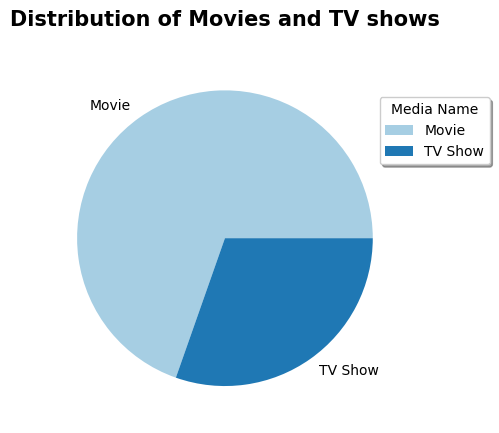

In [28]:
# Creating a pie chart to show the distribution of movies and TV shows. 

palette_color = sns.color_palette('Paired')
netflix.type.value_counts().plot(kind = 'pie', legend = True, colors = palette_color)
plt.title('Distribution of Movies and TV shows', pad = 20, fontweight = 'bold', fontsize = 15)
plt.legend(bbox_to_anchor=(0.9, 0.9), loc='upper left', fancybox=True, shadow=True, title = 'Media Name')
plt.ylabel(None)
plt.show()

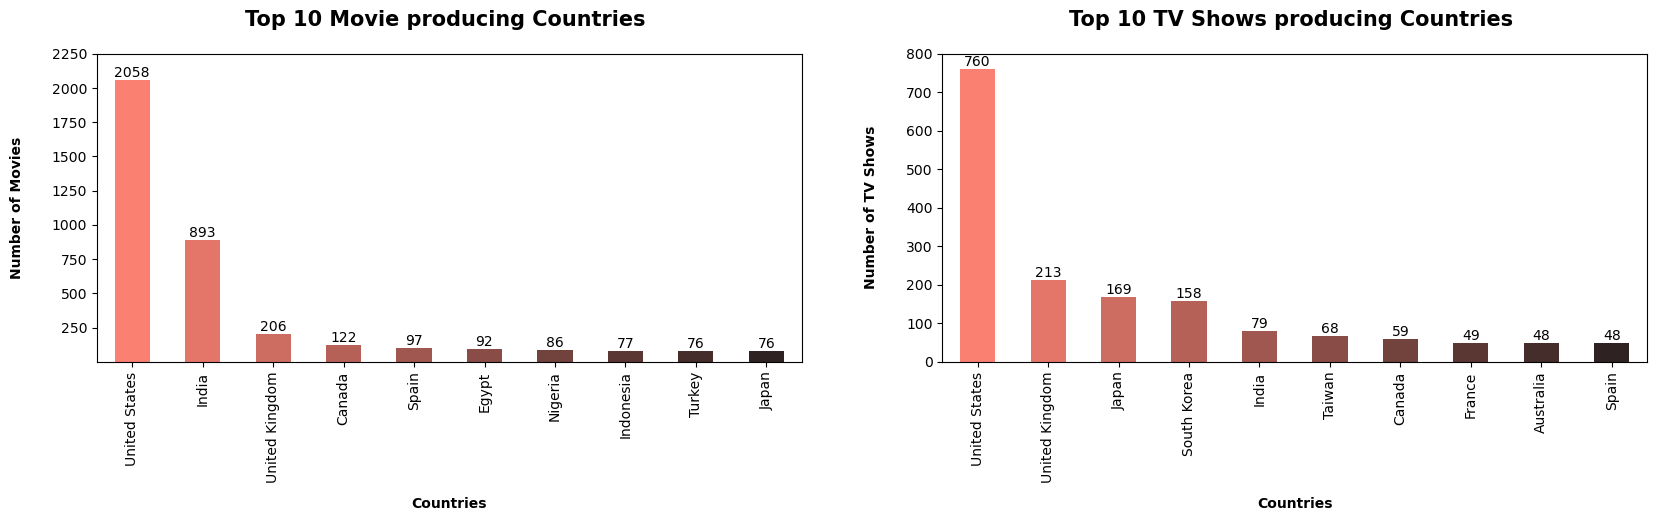

In [29]:
# Creating plots for top 10 countries which are producing movies and TV shows.

# Deciding the color palette
palette_color = sns.color_palette('dark:salmon_r', 10)

# Creating the dataframe for top 10 countries for movies and shows
countries_movies = netflix.loc[(netflix.country != 'Not specified') & (netflix.type == 'Movie')]
countries_shows = netflix.loc[(netflix.country != 'Not specified') & (netflix.type == 'TV Show')]

# Creating the plots 
fig = plt.figure(figsize=(20,4))

plt.subplot(1, 2, 1)
ax1 = countries_movies.country.value_counts()[:10].plot(kind = 'bar',  color = palette_color)
plt.xlabel('Countries', fontweight='bold', labelpad = 10)
plt.ylabel('Number of Movies', fontweight='bold', labelpad = 20)
plt.yticks([250, 500, 750, 1000, 1250, 1500, 1750, 2000, 2250])
plt.title('Top 10 Movie producing Countries ', fontweight='bold', fontsize= 15, pad = 20)

plt.subplot(1, 2, 2)
ax2 = countries_shows.country.value_counts()[:10].plot(kind = 'bar',  color = palette_color)
plt.xlabel('Countries', fontweight='bold', labelpad = 10)
plt.ylabel('Number of TV Shows', fontweight='bold', labelpad = 20)
plt.yticks([0, 100, 200, 300, 400, 500, 600, 700, 800])
plt.title('Top 10 TV Shows producing Countries ', fontweight='bold', fontsize= 15, pad = 20)

# Annotating the values above the bars
for container in ax1.containers:
    ax1.bar_label(container)
for container in ax2.containers:
    ax2.bar_label(container)
    
# Showing the plot

plt.show()

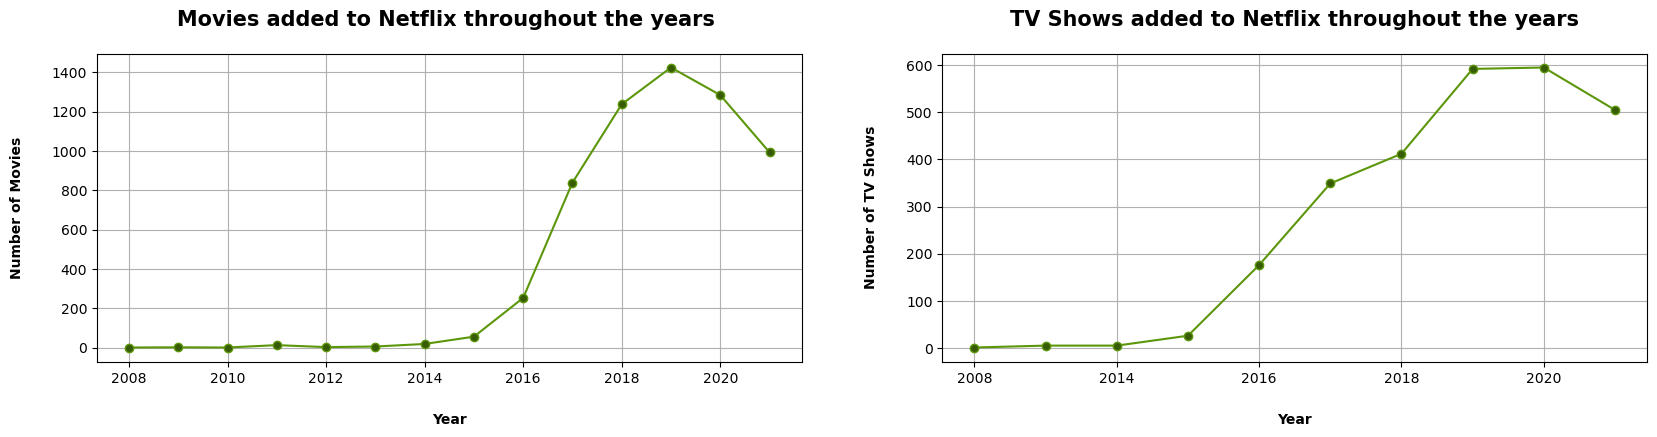

In [30]:
# Creating the plot for number of media added throughout the years on Netflix. 

# Creating the dataframe for top 10 countries for movies and shows
year_movies = netflix.sort_values(by = 'added_year').loc[(netflix.added_year != 'Not specified') & (netflix.type == 'Movie')]
year_shows = netflix.sort_values(by = 'added_year').loc[(netflix.added_year != 'Not specified') & (netflix.type == 'TV Show')]

# Creating the plots 
fig = plt.figure()

plt.subplot(1, 2, 1)
year_movies.added_year.value_counts(sort=False).plot(figsize=(20,4), marker='o',color = '#5c960b', markerfacecolor='#385c06' )
plt.xlabel('Year', fontweight='bold', labelpad = 20)
#plt.xticks(range(2007,2022,1))
plt.ylabel('Number of Movies', fontweight='bold', labelpad = 20)
plt.title('Movies added to Netflix throughout the years ', fontweight='bold', fontsize= 15, pad = 20)
plt.grid()

plt.subplot(1, 2, 2)
year_shows.added_year.value_counts(sort=False).plot(figsize = (20,4), marker='o',color = '#5c960b', markerfacecolor='#385c06')
plt.xlabel('Year', fontweight='bold', labelpad = 20)
plt.ylabel('Number of TV Shows', fontweight='bold', labelpad = 20)
plt.title('TV Shows added to Netflix throughout the years', fontweight='bold', fontsize= 15, pad = 20)
plt.grid()

plt.show()

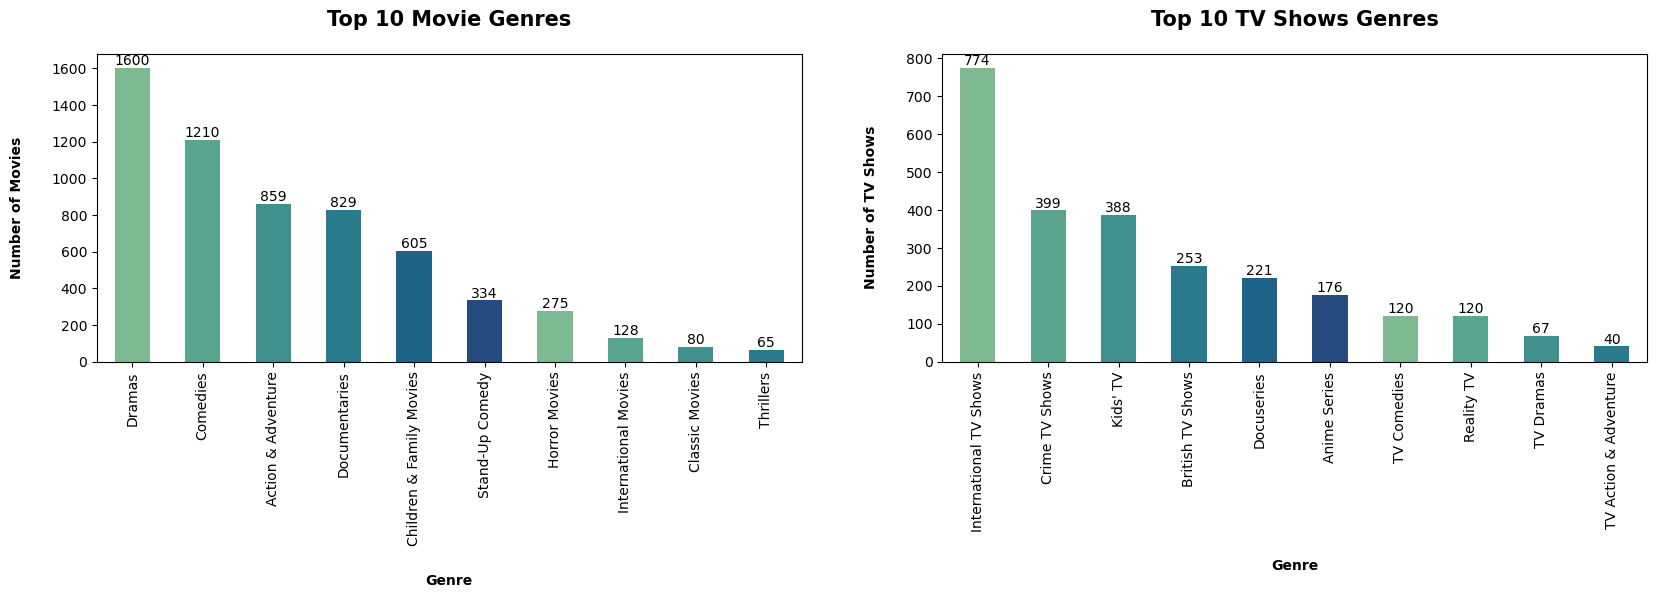

In [31]:
# Creating plots for top 10 genre for movies and TV shows. 

# Deciding the color palette
palette_color = sns.color_palette("crest")

# Creating the dataframe for top 10 countries for movies and shows
genre_movies = netflix.loc[netflix.type == 'Movie']
genre_shows = netflix.loc[netflix.type == 'TV Show']

# Creating the plots 
fig = plt.figure(figsize=(20,4))

plt.subplot(1, 2, 1)
ax1 = genre_movies.genre.value_counts()[:10].plot(kind = 'bar',  color = palette_color)
plt.xlabel('Genre', fontweight='bold', labelpad = 20)
plt.ylabel('Number of Movies', fontweight='bold', labelpad = 20)
plt.title('Top 10 Movie Genres', fontweight='bold', fontsize= 15, pad = 20)

plt.subplot(1, 2, 2)
ax2 = genre_shows.genre.value_counts()[:10].plot(kind = 'bar',  color = palette_color)
plt.xlabel('Genre', fontweight='bold', labelpad = 20)
plt.ylabel('Number of TV Shows', fontweight='bold', labelpad = 20)
plt.title('Top 10 TV Shows Genres', fontweight='bold', fontsize= 15, pad = 20)

# Annotating the values above the bars
for container in ax1.containers:
    ax1.bar_label(container)
for container in ax2.containers:
    ax2.bar_label(container)
    
# Showing the plot
plt.show()

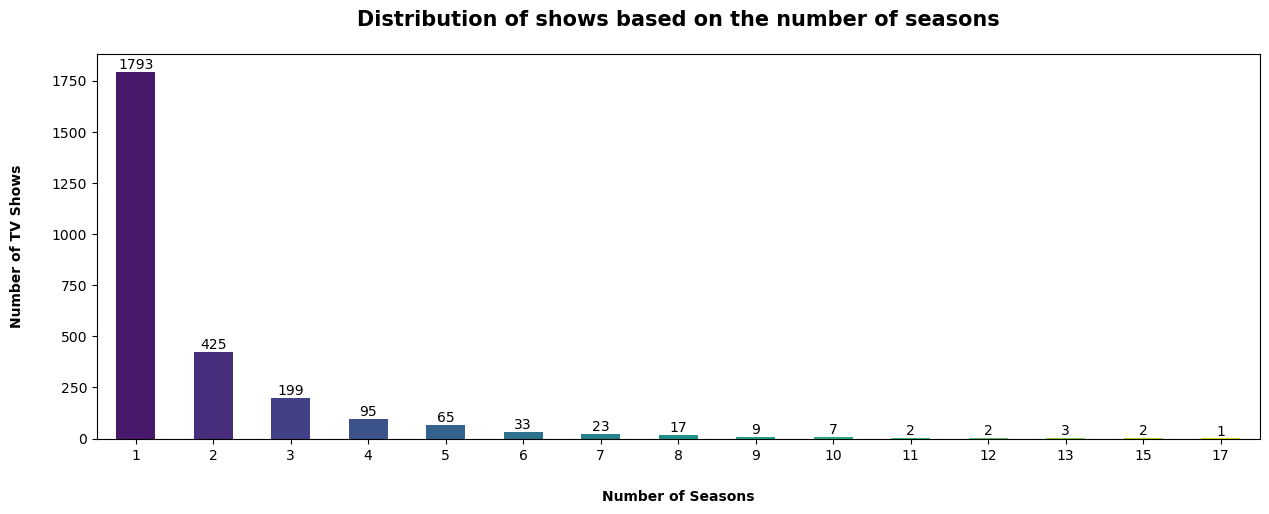

In [32]:
# Creatiing the plot for number of seasons for the TV shows

# Deciding the color palette
palette_color = sns.color_palette('viridis', 15)

# Creating the DataFrame and manipulating the data to get the desired results. 
seasons_data = netflix.loc[~netflix.show_seasons.isin(['NA'])]

# Creating the plot

ax = seasons_data.show_seasons.astype(int).sort_values().value_counts(sort = False).plot(kind = 'bar',  color = palette_color, figsize = (15,5))
plt.xlabel('Number of Seasons', fontweight='bold', labelpad = 20)
plt.xticks(rotation = 0)
plt.ylabel('Number of TV Shows', fontweight='bold', labelpad = 20)
plt.title('Distribution of shows based on the number of seasons', fontweight='bold', fontsize= 15, pad = 20)

# Annotating the values above the bars

for container in ax.containers:
    ax.bar_label(container)
    
# Showing the plot
plt.show()

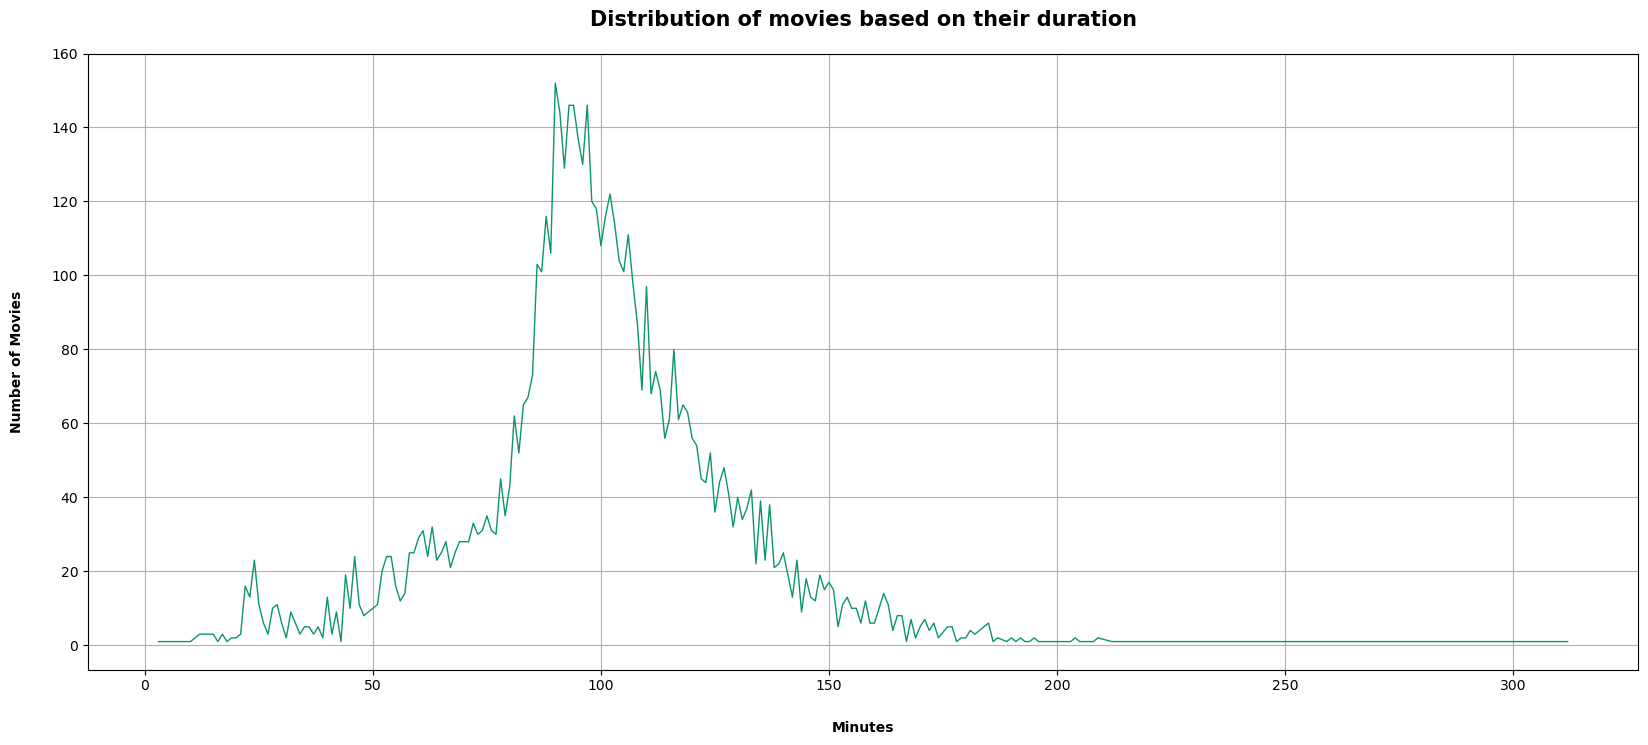

In [33]:
# Creating the plot for the duration of the movies. 

# Creating the DataFrame and manipulating the data to get the desired results. 
duration_data = netflix.loc[~netflix.movies_duration.isin(['NA'])]

# Creating the plot
duration_data.movies_duration.astype(int).sort_values().value_counts(sort = False).plot( figsize = (20,8), color = '#0b9665', linewidth = 1)
plt.xlabel('Minutes', fontweight='bold', labelpad = 20)
plt.ylabel('Number of Movies', fontweight='bold', labelpad = 20)
plt.yticks([0, 20, 40, 60, 80, 100, 120, 140, 160])
plt.title('Distribution of movies based on their duration', fontweight='bold', fontsize= 15, pad = 20)

# Showing the plot
plt.grid()

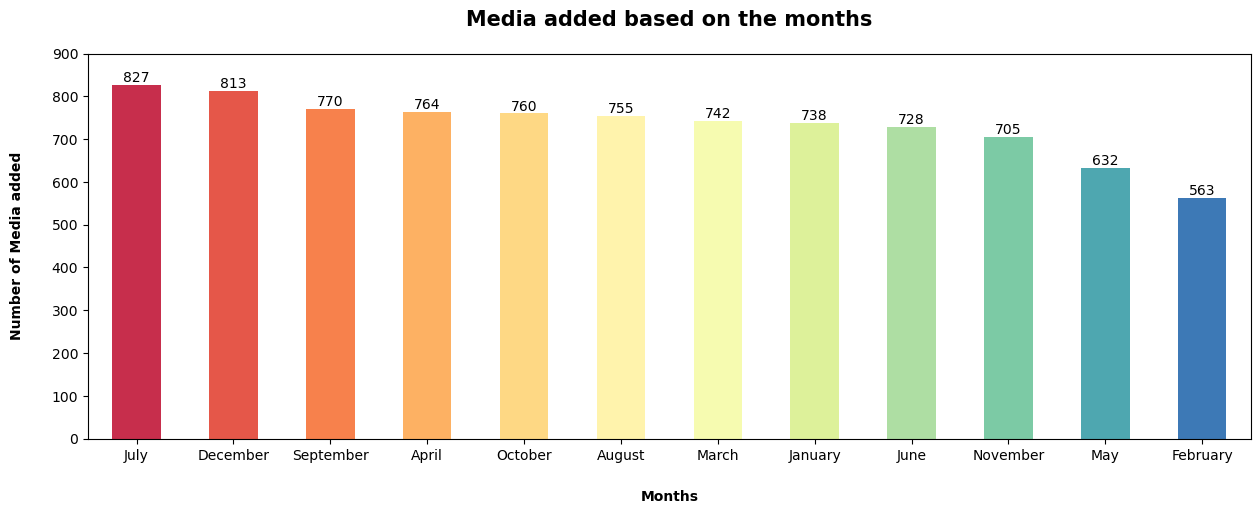

In [34]:
# Creating a chart for the content added to Netfix in different months

# Deciding the color palette
palette_color = sns.color_palette('Spectral', 12)

# Creating the DataFrame and manipulating the data to get the desired results.
months_data = netflix.loc[~netflix.added_month.isin(['Not specified'])]

# Creating the plot

ax = months_data.added_month.value_counts().plot(kind = 'bar',  color = palette_color, figsize = (15,5))
plt.xlabel('Months', fontweight='bold', labelpad = 20)
plt.xticks(rotation = 0)
plt.ylabel('Number of Media added', fontweight='bold', labelpad = 20)
plt.yticks([0,100, 200, 300, 400, 500, 600, 700, 800, 900])
plt.title('Media added based on the months', fontweight='bold', fontsize= 15, pad = 20)

# Annotating the values above the bars

for container in ax.containers:
    ax.bar_label(container)
    
# Showing the plot
plt.show()

# We are done!!!